In [ ]:
!rm -f /root/.netrc
!rm -f /root/.urs_cookies

In [ ]:
!cat /root/.netrc


cat: /root/.netrc: No such file or directory


الكود  ثابت مش بيتغير و هو كود المصادقه

In [ ]:
 #1️⃣ استدعاء المكتبات
from google.colab import userdata
import os
import pandas as pd
import xarray as xr

# 2️⃣ إعداد المصادقة باستخدام Colab Secrets
try:
    username = userdata.get('EARTHDATA_LOGIN')
    password = userdata.get('EARTHDATA_PASSWORD')

    print(f"✅ اسم المستخدم: {username}")
    print(f"✅ كلمة المرور: {'*' * len(password)} (طول: {len(password)})")

    # كتابة ملف .netrc
    netrc_content = f"""machine urs.earthdata.nasa.gov
login {username}
password {password}
"""
    with open('/root/.netrc', 'w') as f:
        f.write(netrc_content)

    # تغيير الأذونات
    !chmod 600 /root/.netrc
    print("✅ تم إعداد المصادقة بنجاح")

except Exception as e:
    print(f"❌ خطأ في بيانات الدخول: {e}")
    exit()


✅ اسم المستخدم: mayar2005
✅ كلمة المرور: ************** (طول: 14)
✅ تم إعداد المصادقة بنجاح


In [ ]:
! pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 113.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.5.0
    Uninstalling tenacity-8.5.0:
      Successfully uninstalled tenacity-8.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.13.0 requires tenacity<9.0.0,>=8.0.0, but you have tenacity 9.1.2 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.

In [ ]:
import xarray as xr
import earthaccess

# تسجيل الدخول (بيقرأ من .netrc لو موجود)
results = earthaccess.search_data(
    short_name="M2T1NXSLV",
    version="5.12.4",
    temporal=("2015-01-01", "2015-2-1"),
    bounding_box=(-89, 41, -87, 43)  # نفس اللات واللون
)

files = earthaccess.open(results)
#ds = xr.open_mfdataset(files, combine="by_coords")
#ds = xr.open_mfdataset(
    #files,
   # combine="by_coords",)[["T2M", "QV2M"]]
ds = xr.open_mfdataset(
    files,
    combine="by_coords",
    parallel=True
)[["T2M", "QV2M"]]


QUEUEING TASKS | :   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
cairo_lat, cairo_lon = 30.0444, 31.2357
cairo_data = ds.sel(lat=cairo_lat, lon=cairo_lon, method="nearest")

print(cairo_data["T2M"])


<xarray.DataArray 'T2M' (time: 768)> Size: 3kB
dask.array<getitem, shape=(768,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 8B 31.25
    lat      float64 8B 30.0
  * time     (time) datetime64[ns] 6kB 2015-01-01T00:30:00 ... 2015-02-01T23:...
Attributes:
    long_name:       2-meter_air_temperature
    units:           K
    fmissing_value:  1000000000000000.0
    standard_name:   2-meter_air_temperature
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]


In [ ]:
df = cairo_data["T2M"].to_dataframe().reset_index()
df["T2M_C"] = df["T2M"] - 273.15  # نحول لدرجة مئوية
print(df.head())


                 time    lon   lat         T2M     T2M_C
0 2015-01-01 00:30:00  31.25  30.0  282.353638  9.203644
1 2015-01-01 01:30:00  31.25  30.0  282.022980  8.872986
2 2015-01-01 02:30:00  31.25  30.0  281.643585  8.493591
3 2015-01-01 03:30:00  31.25  30.0  280.569214  7.419220
4 2015-01-01 04:30:00  31.25  30.0  279.741486  6.591492


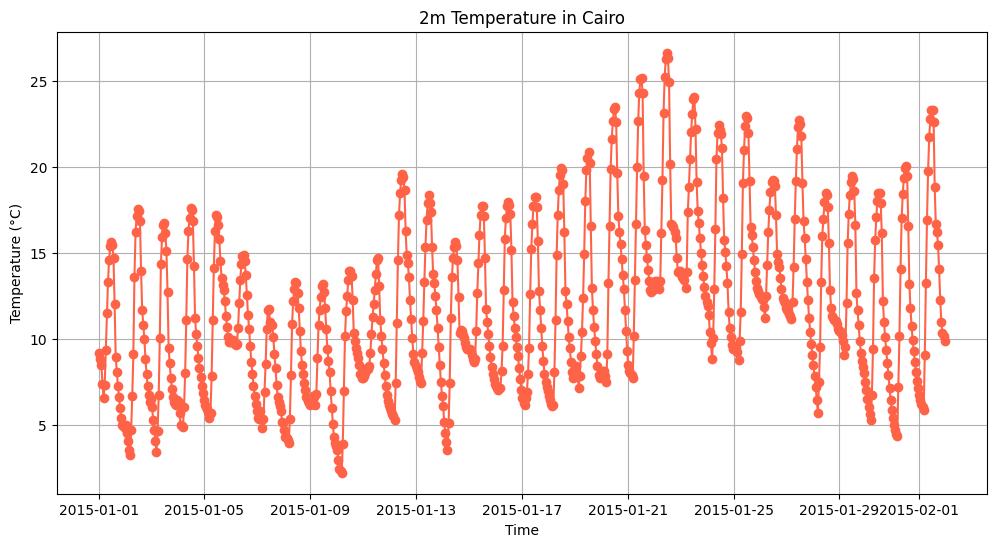

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["time"], df["T2M_C"], marker="o", color="tomato")
plt.title("2m Temperature in Cairo")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


In [ ]:
# لو عايزة تشوفي أسماء المتغيرات الفيزيائية
print(ds.data_vars)

# لو عايزة كل حاجة (dimensions + variables + attributes)
print(ds)

# لو عايزة تختصري وتجيبي list بس
print(list(ds.data_vars.keys()))

# أو تلخصي الملف كله
ds.info()


Data variables:
    T2M      (time, lat, lon) float32 639MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    QV2M     (time, lat, lon) float32 639MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
<xarray.Dataset> Size: 1GB
Dimensions:  (time: 768, lat: 361, lon: 576)
Coordinates:
  * lon      (lon) float64 5kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 6kB 2015-01-01T00:30:00 ... 2015-02-01T23:...
Data variables:
    T2M      (time, lat, lon) float32 639MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
    QV2M     (time, lat, lon) float32 639MB dask.array<chunksize=(1, 91, 144), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Thu Mar 12 04...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MERRA2_400.tavg1_2d_slv_Nx.20150101.n

In [1]:
ds.head()

NameError: name 'ds' is not defined